In [244]:
# DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
# SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# helpers
%matplotlib inline

In [246]:
#import data
data = pd.read_csv('Demographic_Data.csv')

In [247]:
# Evaluate data
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [248]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [249]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [11]:
# Preprocess

In [251]:
data = data.drop_duplicates()

In [252]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(0, 5)


,in-store,age,items,amount,region


In [253]:
data = data.drop_duplicates()
data.duplicated().any()

False

In [254]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [100]:
# Discretize amount and age

In [255]:
import pandas as pd
import numpy as np
pd.read_csv('Demographic_Data.csv')

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [256]:
df= pd.read_csv('Demographic_Data.csv')
pd.cut(df['amount'], bins = 4)

0             (2.01, 753.754]
1             (2.01, 753.754]
2        (1502.502, 2251.251]
3             (2.01, 753.754]
4        (1502.502, 2251.251]
                 ...         
79995         (2.01, 753.754]
79996    (1502.502, 2251.251]
79997         (2.01, 753.754]
79998         (2.01, 753.754]
79999         (2.01, 753.754]
Name: amount, Length: 80000, dtype: category
Categories (4, interval[float64, right]): [(2.01, 753.754] < (753.754, 1502.502] < (1502.502, 2251.251] < (2251.251, 3000.0]]

In [257]:
pd.cut(df ['amount'], bins = 4). value_counts()

(2.01, 753.754]         46599
(753.754, 1502.502]     18046
(1502.502, 2251.251]    10321
(2251.251, 3000.0]       5034
Name: amount, dtype: int64

In [258]:
amtBin = ['$0-700', '$701-1400', '$1401-2100', '$2101-3000']
cut_bins = [2, 700, 1503, 2252, 3000]

In [259]:
df ['amtBin'] = pd.cut(df ['amount'], bins = cut_bins, labels = amtBin)

In [260]:
df.head()

,in-store,age,items,amount,region,amtBin
0,0,37,4,281.03,2,$0-700
1,0,35,2,219.51,2,$0-700
2,1,45,3,1525.70,4,$1401-2100
3,1,46,3,715.25,3,$701-1400
4,1,33,4,1937.50,1,$1401-2100


In [261]:
pd.cut(df['age'], bins = 4)
pd.cut(df ['age'], bins = 4). value_counts()

(34.75, 51.5]      29723
(17.933, 34.75]    22454
(51.5, 68.25]      19848
(68.25, 85.0]       7975
Name: age, dtype: int64

In [262]:
ageBin = ['0-18', '19-37', '38-56', '57-75', '75-93']
cut_bins = [0, 17, 34, 51, 68, 85]
df ['ageBin'] = pd.cut(df ['age'], bins = cut_bins, labels = ageBin)
df.head()

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.03,2,$0-700,38-56
1,0,35,2,219.51,2,$0-700,38-56
2,1,45,3,1525.70,4,$1401-2100,38-56
3,1,46,3,715.25,3,$701-1400,38-56
4,1,33,4,1937.50,1,$1401-2100,19-37


In [263]:
# Analize data
import pandas as pd
import matplotlib.pyplot as plt

In [276]:
# Visualizations
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [265]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


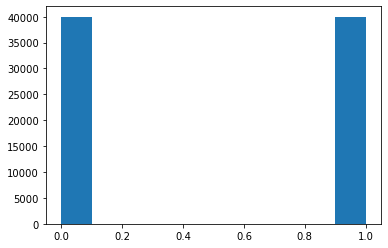

In [266]:
plt.hist(data['in-store'])
plt.show()

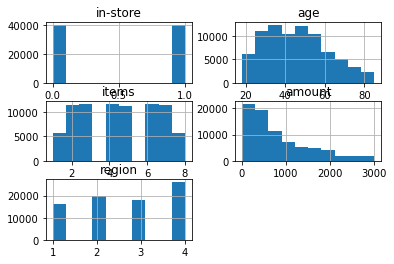

In [267]:
data.hist()
plt.show()

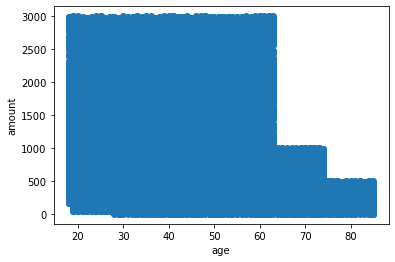

In [277]:
# Scatter plot example
data_sample = data
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
# assignment: add axis titles
plt.ylabel('amount')
plt.xlabel('age')
plt.show()

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


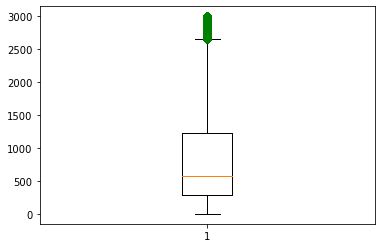

In [275]:
# Box plot example
# eval col names/features
header = data.dtypes.index
print(header)
# plot
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

In [116]:
# stacked col

In [99]:
# 1a) Do customers in different regions spend more per transaction (number of obs per spend category)?
# 1b) Which regions spend the most/least (overall - just from looking at the chart)?

In [269]:
import pandas as pd
import numpy as np
pd.read_csv('Demographic_Data.csv')

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [270]:
# importing package
import matplotlib.pyplot as plt

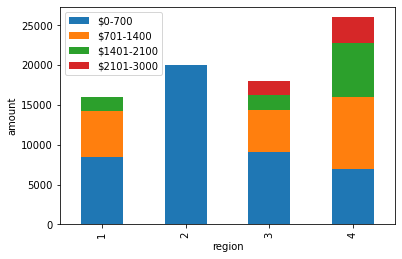

In [278]:
np.random.seed(1)
df.groupby('region')['amtBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
plt.ylabel('amount')
plt.xlabel('region')
plt.show()

In [272]:
# other visualization
demographic_df=pd.read_csv('Demographic_Data.csv')

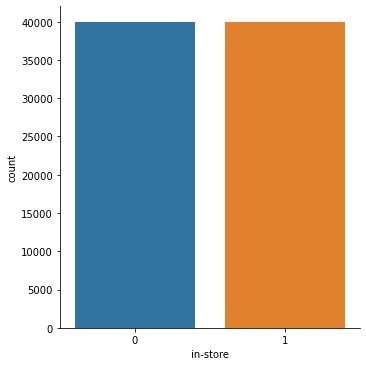

In [273]:
# in-store purchases
sns.catplot(x='in-store', data=demographic_df, kind='count', aspect=1.0)

In [103]:
# in-store purchase per region
demographic_df.groupby(['in-store', 'region'])['in-store'].count()

in-store  region
0         2         20000
          3          7001
          4         12999
1         1         16000
          3         10999
          4         13001
Name: in-store, dtype: int64

In [227]:
# in-store mean of purchase per region
import pandas as pd
df= pd.read_csv('Demographic_Data.csv')
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [235]:
df.groupby(['region']).mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.703938,4.510063,745.161491
2,0.000000,56.610350,4.512750,252.109196
3,0.611056,45.646944,4.494000,917.969637
4,0.500038,38.750731,4.503462,1284.052012


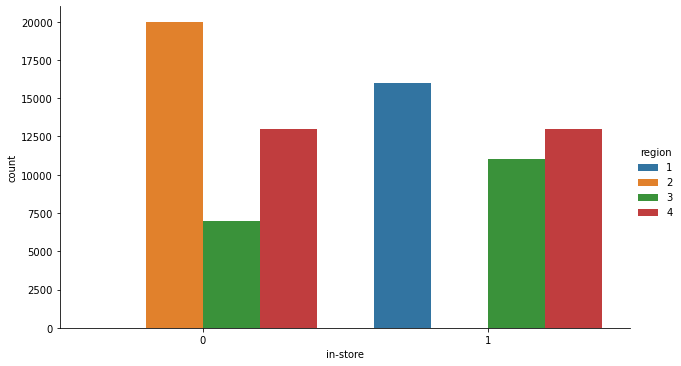

In [104]:
# in-store purchases per region
g = sns.catplot(x='in-store', data=demographic_df, hue='region', kind='count', aspect=1.75)
g.set_xlabels('in-store')

In [48]:
demographic_df.pivot_table('age', 'items', 'region', aggfunc=np.mean, margins=True)

region,1,2,3,4,All
items,,,,,
1,43.303797,56.934858,46.388889,38.885307,45.969479
2,43.448245,56.521032,45.714286,38.766039,45.721878
3,44.059560,56.023563,45.382070,38.885146,45.577871
4,43.686192,56.548064,45.312897,38.725474,45.712401
5,43.815707,56.963954,45.360923,38.705052,45.765083
6,43.456743,57.196750,45.728429,38.917221,45.921107
7,43.993122,56.293430,46.008567,38.576572,45.818773
8,43.645570,56.500697,45.692427,38.465600,45.610055
All,43.703938,56.610350,45.646944,38.750731,45.757925


In [ ]:
# Feature Selection
# 2) Is there a relationship between the number of items purchased and amount spent?

In [109]:
# correlation
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


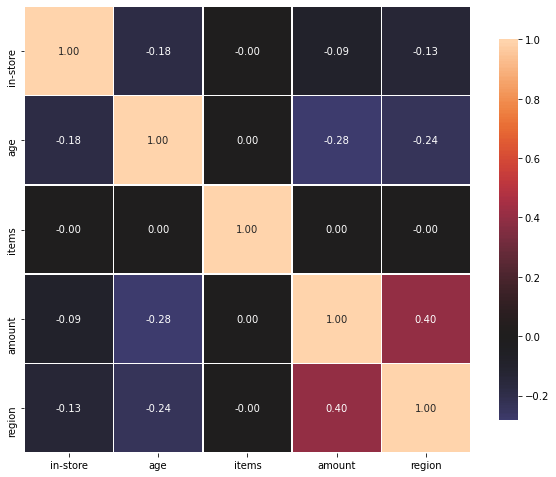

In [117]:
# plot heatmap
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [111]:
# covariance
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321
